In [9]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

#import neural_network as nn
from sklearn.neural_network import MLPClassifier


import sqlite3
connection = sqlite3.connect("./database/bdfinal.sql")

In [11]:
oneHotEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
labelEncoder = LabelEncoder()

## 1º Try - The most basic model possible

In [12]:
query = "select teams.tmID as tmID, playerID, teams.year as year, playoff from players_teams join teams \
on teams.tmID = players_teams.tmID and teams.year = players_teams.year order by teams.year, teams.name ;"

df = pd.read_sql(query, connection)
categorical_columns = ["tmID", "playerID"]

for col in categorical_columns:
    df[col] = labelEncoder.fit_transform(df[col].astype('str'))
    
# replace 'Y' and 'N' with 1 and 0 in the playoff column
df["playoff"] = df["playoff"].replace("Y", 1)
df["playoff"] = df["playoff"].replace("N", 0)
    
print(df.head())
    
# split the data into train and test

train_df = df[df["year"] < 10]

train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values
    
test_df = df[df["year"] == 10]

print(test_df)

test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values


   tmID  playerID  year  playoff
0     1        38     1      0.0
1     1        64     1      0.0
2     1       151     1      0.0
3     1       152     1      0.0
4     1       226     1      0.0
      tmID  playerID  year  playoff
1711     0        92    10      1.0
1712     0       134    10      1.0
1713     0       231    10      1.0
1714     0       283    10      1.0
1715     0       291    10      1.0
...    ...       ...   ...      ...
1871    20       288    10      1.0
1872    20       321    10      1.0
1873    20       344    10      1.0
1874    20       366    10      1.0
1875    20       448    10      1.0

[165 rows x 4 columns]


### Decision Tree Algorithm

Accuracy: 0.5454545454545454
Precision: 0.6310679611650486
Recall: 0.6372549019607843
F1: 0.6341463414634146
Confusion matrix:
[[25 38]
 [37 65]]


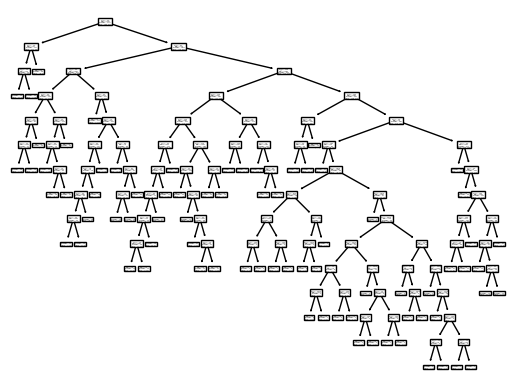

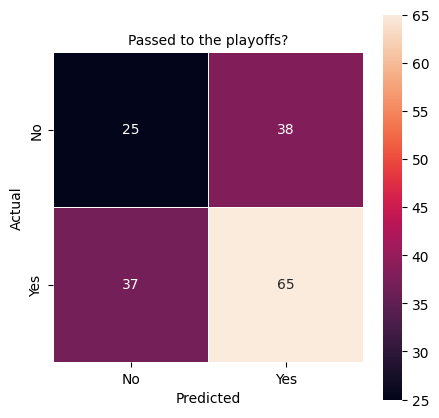

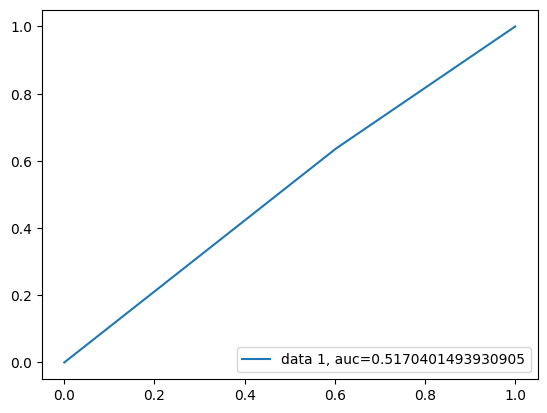

In [13]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression 

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


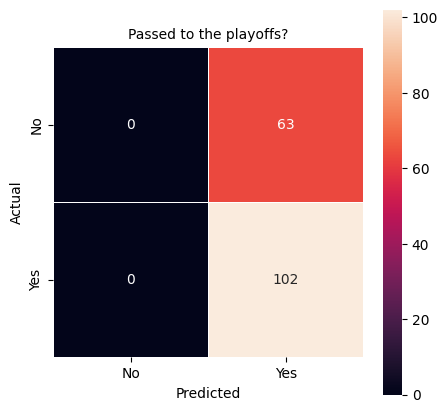

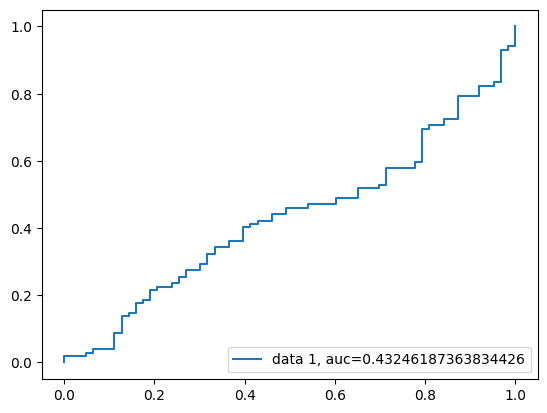

In [14]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Naive Bayes

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


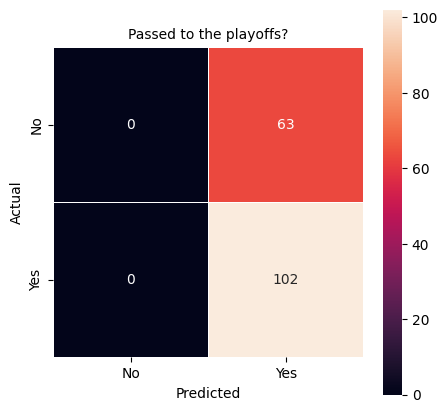

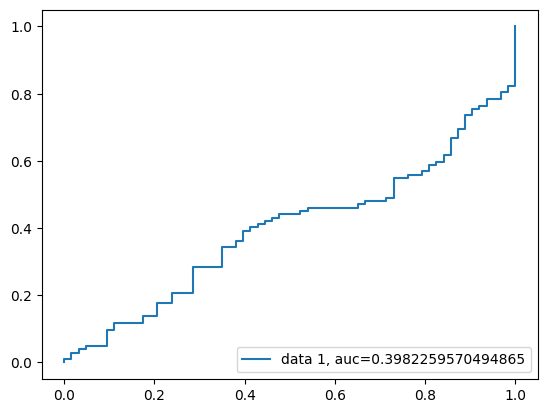

In [15]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Machine

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


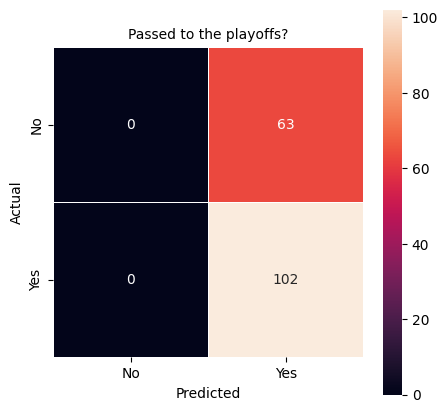

In [16]:
# SVM
svm = SVC(kernel='linear')
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

## 2º Try - Team Performance in Consideration

In [17]:
## create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

## obtain the team IDS and year
team_ids = pd.read_sql("select tmID, year from teams", connection)

## iterate through each team and year
for index, row in team_ids.iterrows():
    ## obtain the team ID and year for each row
    team_id = row['tmID']
    year = row['year']
    
    if(year == 1):
        continue
    
    query = "select tmID, year + 1 as year, avg(oRebounds), avg(dRebounds), avg(rebounds), avg(assists), avg(steals), avg(blocks), \
        avg(turnovers), avg(PF), avg(fgAttempted), avg(fgMade), avg(ftAttempted), avg(ftMade), avg(threeAttempted), avg(threeMade) \
        from players_teams where tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
        
    ## obtain the average stats for each team
    team_stats = pd.read_sql(query, connection)
    
    query = "select avg(weight), avg(height) from players_teams join players on players.bioID = players_teams.playerID \
        where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average weight and height for each team
    team_weight_height = pd.read_sql(query, connection)
    
    ## add the average weight and height to the team stats
    team_stats['weight'] = team_weight_height['avg(weight)']
    team_stats['height'] = team_weight_height['avg(height)']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # include in the query the win and loss ratio
    query = "select tmID, year, won, lost, GP from teams where tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    
    team_win_loss = pd.read_sql(query, connection)
    
    # obtain the win and loss ratio
    win_ratio = team_win_loss['won'] / team_win_loss['GP']
    loss_ratio = team_win_loss['lost'] / team_win_loss['GP']
    
    # add the win and loss ratio to the team stats
    team_stats['win_ratio'] = win_ratio
    team_stats['loss_ratio'] = loss_ratio
    
    query = "select count(pt.playerID) as num_player_awards from players_teams pt join awards_players ap on pt.playerID = ap.playerID \
        where pt.year = ap.year and pt.tmID = '" + team_id + "' and pt.year < " + str(year) + " group by pt.tmID, ap.year;"
        
    team_awards = pd.read_sql(query, connection)
    
    # add the number of player awards to the team stats
    team_stats['num_player_awards'] = team_awards['num_player_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # obtain the number of coach awards
    query = "select count(coachID) as num_coach_awards from coaches join awards_players ap on coaches.coachID = ap.playerID \
        where coaches.year = ap.year and coaches.tmID = '" + team_id + "' and coaches.year < " + str(year) + " group by coaches.tmID, ap.year;"
        
    team_coach_awards = pd.read_sql(query, connection)
    
    # add the number of coach awards to the team stats
    team_stats['num_coach_awards'] = team_coach_awards['num_coach_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
        
    query = "select tmID, year from teams where semis <> '' and tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    semis = pd.read_sql(query, connection)
    
    # team reached semis
    if semis.empty:
        team_stats['semis'] = 0
    else:
        team_stats['semis'] = 1
        
    query = "select tmID, year from teams where finals <> '' and tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    finals = pd.read_sql(query, connection)
    
    # team reached finals
    if finals.empty:
        team_stats['finals'] = 0
    else:
        team_stats['finals'] = 1
        
    query = "select playoff from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    playoff = pd.read_sql(query, connection)
    
    # check if it's Y or N
    if playoff['playoff'][0] == 'Y':
        team_stats['playoff'] = 1
    else:
        team_stats['playoff'] = 0
        
    
    # append the stats to the dataframe
    df = df._append(team_stats, ignore_index=True)
    
    if(year == 10):
        print(team_stats)

  tmID  year  avg(oRebounds)  avg(dRebounds)  avg(rebounds)  avg(assists)  \
0  ATL    10       21.214286       46.428571      67.642857     34.428571   

   avg(steals)  avg(blocks)  avg(turnovers)    avg(PF)  ...  avg(threeMade)  \
0    20.142857     8.214286       35.642857  50.357143  ...       14.428571   

       weight     height  win_ratio  loss_ratio  num_player_awards  \
0  159.076923  72.538462   0.117647    0.882353                  0   

   num_coach_awards  semis  finals  playoff  
0                 0      0       0        1  

[1 rows x 25 columns]
  tmID  year  avg(oRebounds)  avg(dRebounds)  avg(rebounds)  avg(assists)  \
0  CHI    10       27.461538       59.230769      86.692308     42.153846   

   avg(steals)  avg(blocks)  avg(turnovers)    avg(PF)  ...  avg(threeMade)  \
0    20.692308    11.461538       37.307692  49.153846  ...        8.461538   

       weight     height  win_ratio  loss_ratio  num_player_awards  \
0  164.333333  71.916667   0.352941    0.64705

In [18]:
# encode the categorical columns

team_pairs = []
team_names = df["tmID"].values
df["tmID"] = labelEncoder.fit_transform(df["tmID"].astype('str'))   

team_pairs = set(zip(team_names, df["tmID"].values))

print(team_pairs)   
        
# remove the rows that have year = 10
train_df = df[df.year < 10]

# remove the rows that have year <> 10
test_df = df[df.year == 10]

# create the training labels and inputs
train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values

# create the testing labels and inputs
test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

{('CHA', 2), ('LAS', 9), ('UTA', 19), ('PHO', 14), ('NYL', 12), ('CLE', 4), ('MIA', 10), ('WAS', 20), ('SAC', 16), ('DET', 6), ('CHI', 3), ('SAS', 17), ('CON', 5), ('HOU', 7), ('ATL', 1), ('SEA', 18), (0, 0), ('MIN', 11), ('IND', 8), ('POR', 15), ('ORL', 13)}


## Decision Tree Classifier

Accuracy: 0.46153846153846156
Precision: 0.5714285714285714
Recall: 0.5
F1: 0.5333333333333333
Confusion matrix:
[[2 3]
 [4 4]]


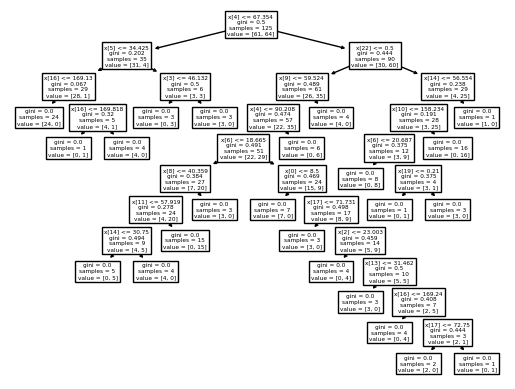

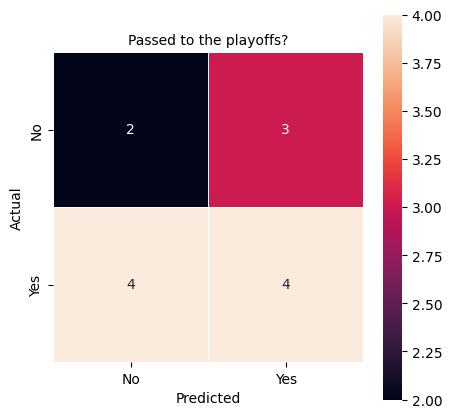

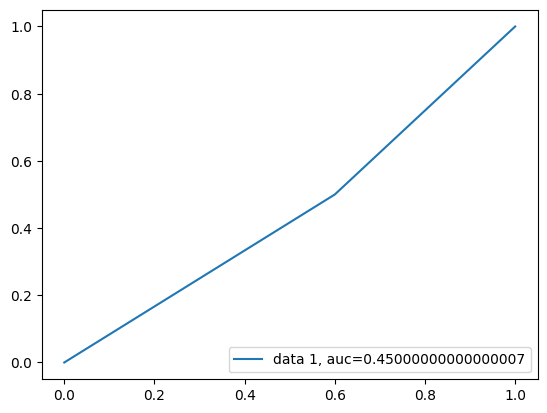

In [23]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [24]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print the probabilities for each class
probs = clf.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 1.0), ('MIN', 1.0), ('PHO', 1.0), ('SAS', 1.0), ('SAC', 0.0), ('SEA', 0.0)]
[('CON', 1.0), ('NYL', 1.0), ('WAS', 1.0), ('ATL', 0.0), ('CHI', 0.0), ('DET', 0.0), ('IND', 0.0)]


## Logistic Regression

Accuracy: 0.46
Precision: 0.56
Recall: 0.62
F1: 0.59


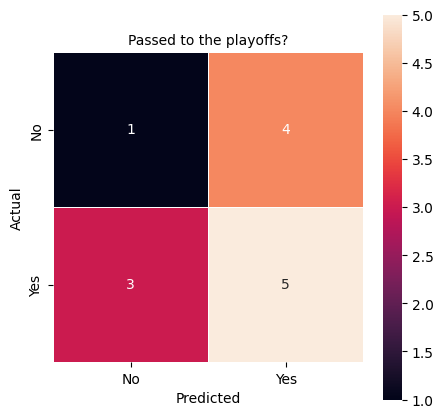

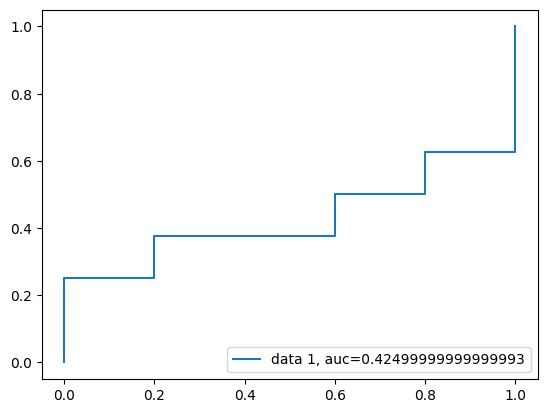

In [26]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.9454380001669966), ('SEA', 0.8920429417863626), ('SAC', 0.7147255846462541), ('SAS', 0.5773567767928786), ('MIN', 0.47947238638612366), ('PHO', 0.47759074505642934)]
[('DET', 0.9624791631597175), ('CON', 0.9260476082694832), ('NYL', 0.872016824085871), ('WAS', 0.6401421949502522), ('CHI', 0.6264445037191694), ('IND', 0.43221582364756334), ('ATL', 0.027837802411537906)]


## Naive Bayes

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


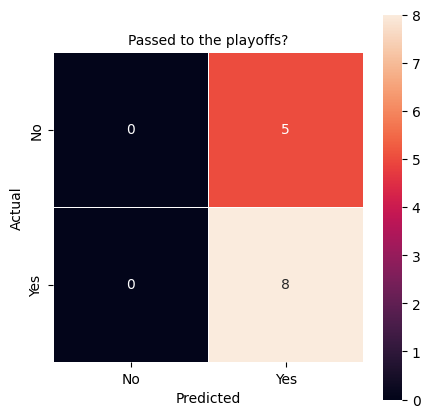

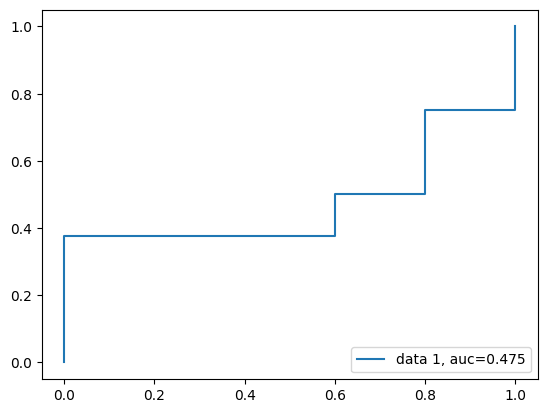

In [28]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = gnb.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('SAS', 1.0), ('LAS', 0.9999999999992966), ('SAC', 0.999999988352414), ('SEA', 0.9999999561468381), ('MIN', 0.9999999499033349), ('PHO', 0.9999999252165735)]
[('DET', 0.9999999999994031), ('NYL', 0.9999999987085246), ('CON', 0.9999999930611878), ('IND', 0.9999998881845817), ('CHI', 0.9999998216653924), ('WAS', 0.9999732290797135), ('ATL', 0.9989484770706153)]


## Support Vector Machines

Accuracy: 0.54
Precision: 0.60
Recall: 0.75
F1: 0.67


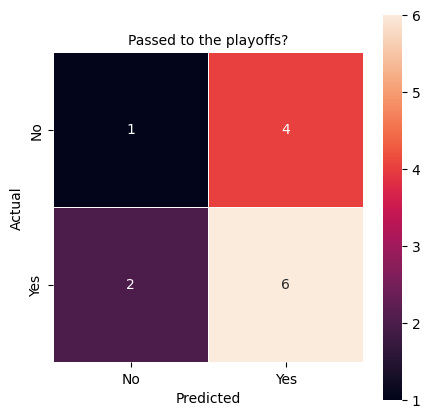

In [30]:
# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()


In [31]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = svm.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.7297782032789528), ('SEA', 0.6432107690988107), ('SAS', 0.565839190533775), ('PHO', 0.5545069923336442), ('SAC', 0.5300229613321087), ('MIN', 0.5)]
[('DET', 0.7060117437512726), ('CON', 0.6668541306443007), ('NYL', 0.6188249479054749), ('CHI', 0.6143962412270637), ('WAS', 0.5683547857955139), ('IND', 0.5166107091491366), ('ATL', 0.37257417163700685)]


# 3rd try - Based on the players perfomance

In [22]:
#create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

query = "select players.*, year, stint ,tmID ,GP ,GS ,minutes ,points ,oRebounds ,dRebounds ,rebounds ,assists ,steals , \
    blocks ,turnovers ,PF ,fgAttempted ,fgMade ,ftAttempted ,ftMade ,threeAttempted ,threeMade ,dq from players \
    join players_teams on players.bioID = players_teams.playerID;"

players = pd.read_sql(query, connection)

# add the number of player awards to the player stats
players['num_player_awards'] = 0
query = "select playerID, count(playerID) as num_player_awards, year from awards_players group by playerID, year;"

player_awards = pd.read_sql(query, connection)

# add the number of player awards to the player stats
for index, row in player_awards.iterrows():
    player_id = row['playerID']
    year = row['year']
    num_player_awards = row['num_player_awards']
    
    players.loc[(players['bioID'] == player_id) & (players['year'] == year), 'num_player_awards'] = num_player_awards
    
# replace the column name stint with stint
players = players.rename(columns={"stint": "stint"})


In [ ]:
categorical_columns = ["tmID", "bioID", "pos", "college", "collegeOther"]

for col in categorical_columns:
    players[col] = labelEncoder.fit_transform(players[col].astype('str'))

# replace the birthDate with the birthYear
players["birthDate"] = (players["birthDate"].str[:4]).astype('int64')

# replace the deathDate with the deathYear
players["deathDate"] = (players["deathDate"].str[:4]).astype('int64')

# remove the rows that have year = 10
train_df = players[players.year < 10]

# remove the rows that have year <> 10
test_df = players[players.year == 10]

# obtain the number of columns
num_columns = len(train_df.columns)
print(num_columns)



In [35]:
# obtain the number of columns
num_columns = len(train_df.columns)
print(num_columns)

# create the training labels and inputs
train_inputs = train_df.iloc[:, :11].values
train_labels = train_df.iloc[:, 11:].values

# create the testing labels and inputs
test_inputs = test_df.iloc[:, :11].values
test_labels = test_df.iloc[:, 11:].values



31


## Logistic Regression

In [ ]:
from sklearn.multioutput import MultiOutputRegressor


logreg = MultiOutputRegressor(LogisticRegression(multi_class="multinomial",max_iter=1000, solver="newton-cg"))
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

print(y_pred)


# 4th try - The best model

In [2]:
## create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

## obtain the team IDS and year
team_ids = pd.read_sql("select tmID, year, confID from teams order by tmID", connection)



## iterate through each team and year
for index, row in team_ids.iterrows():

    ## obtain the team ID and year for each row
    team_id = row['tmID']
    year = row['year']
    confID = row['confID']

    # get all players from the team and year
    query = "select tmID, year, playerID from players_teams where tmID = '" + team_id + "' and year = " + str(year) + ";"

    ## obtain the players for each team
    team_players = pd.read_sql(query, connection)
    # points, oRebounds, dRebounds, rebounds, assists, steals, blocks, turnovers, PF, fgAttempted, fgMade, ftAttempted, ftMade, threeAttempted, threeMade
    team_stats = {"year": year, "points": 0, "oRebounds": 0, "dRebounds": 0, "rebounds": 0,
                  "assists": 0, "steals": 0, "blocks": 0, "turnovers": 0, "PF": 0, "fgAttempted": 0,
                  "fgMade": 0, "ftAttempted": 0, "ftMade": 0, "threeAttempted": 0, "threeMade": 0,
                  'weight': 0, "height": 0, "player_awards": 0, "confID": confID, "num_playoffs": 0,
                  "num_semis": 0, "num_finals": 0, "coach_win_ratio": 0, "coach_stint": 0,
                  "playoff": 0}

    # iterate through each player
    for idx, r in team_players.iterrows():
        ## obtain the player ID for each row
        player_id = r['playerID']

        # get the player's position
        query = "select pos from players where bioID = '" + player_id + "';"
        pos = pd.read_sql(query, connection).values[0][0]

        # get number of years played
        query = "select count(distinct year) as num_years from players_teams where playerID = '" + player_id + "' and year < " + str(year) + ";"
        num_years = pd.read_sql(query, connection).values[0][0]

        if num_years == 0:
            query = "select avg(points) as points, avg(oRebounds) as oRebounds, avg(dRebounds) as dRebounds, avg(rebounds) as rebounds, avg(assists) as assists, \
                avg(steals) as steals, avg(blocks) as blocks, avg(turnovers) as turnovers, avg(PF) as PF, avg(fgAttempted) as fgAttempted, \
                avg(fgMade) as fgMade, avg(ftAttempted) as ftAttempted, avg(ftMade) as ftMade, avg(threeAttempted) as threeAttempted, avg(threeMade) as threeMade \
                from players_teams join players on players_teams.playerID = players.bioID where year = " + str(year - 1) + " \
                and pos = '" + pos + "' and playerID not in (select playerID from players_teams where year < " + str(year - 1) + ");"
            player_stats = pd.read_sql(query, connection)

            ## add the player stats to the team stats
            team_stats['points'] += (player_stats['points'].values[0] or 0 )
            team_stats['oRebounds'] += (player_stats['oRebounds'].values[0] or 0 )
            team_stats['dRebounds'] += (player_stats['dRebounds'].values[0] or 0 )
            team_stats['rebounds'] += (player_stats['rebounds'].values[0] or 0 )
            team_stats['assists'] += (player_stats['assists'].values[0] or 0 )
            team_stats['steals'] += (player_stats['steals'].values[0] or 0 )
            team_stats['blocks'] += (player_stats['blocks'].values[0] or 0 )
            team_stats['turnovers'] += (player_stats['turnovers'].values[0] or 0 )
            team_stats['PF'] += (player_stats['PF'].values[0] or 0 )
            team_stats['fgAttempted'] += (player_stats['fgAttempted'].values[0] or 0 )
            team_stats['fgMade'] += (player_stats['fgMade'].values[0] or 0 )
            team_stats['ftAttempted'] += (player_stats['ftAttempted'].values[0] or 0 )
            team_stats['ftMade'] += (player_stats['ftMade'].values[0] or 0 )
            team_stats['threeAttempted'] += (player_stats['threeAttempted'].values[0] or 0 )
            team_stats['threeMade'] += (player_stats['threeMade'].values[0] or 0 )
            
        else:

            query = "select year, points, oRebounds, dRebounds, rebounds, assists, \
                    steals, blocks, turnovers, PF, fgAttempted, \
                    fgMade, ftAttempted, ftMade, threeAttempted, sum(threeMade) as threeMade \
                    from players_teams where playerID = '" + player_id + "' and year < " + str(year) + ";"
        
            ## obtain the average stats for each team
            player_stats = pd.read_sql(query, connection)

            points = oRebounds = dRebounds = rebounds = assists = steals = blocks = turnovers = PF = fgAttempted = fgMade = ftAttempted = ftMade = threeAttempted = threeMade = 0
            sum_weight = 0
            # iterate player stats and make weighted average for each year
            for j, row2 in player_stats.iterrows():

                iteration_year = row2['year']

                weight = 1 / (year - iteration_year)

                sum_weight += weight

                points += row2['points'] * weight
                oRebounds += row2['oRebounds'] * weight
                dRebounds += row2['dRebounds'] * weight
                rebounds += row2['rebounds'] * weight
                assists += row2['assists'] * weight
                steals += row2['steals'] * weight
                blocks += row2['blocks'] * weight
                turnovers += row2['turnovers'] * weight
                PF += row2['PF'] * weight
                fgAttempted += row2['fgAttempted'] * weight
                fgMade += row2['fgMade'] * weight
                ftAttempted += row2['ftAttempted'] * weight
                ftMade += row2['ftMade'] * weight
                threeAttempted += row2['threeAttempted'] * weight
                threeMade += row2['threeMade'] * weight

            # add the player stats to the team stats
            team_stats['points'] += points / sum_weight
            team_stats['oRebounds'] += oRebounds / sum_weight
            team_stats['dRebounds'] += dRebounds / sum_weight
            team_stats['rebounds'] += rebounds / sum_weight
            team_stats['assists'] += assists / sum_weight
            team_stats['steals'] += steals / sum_weight
            team_stats['blocks'] += blocks / sum_weight
            team_stats['turnovers'] += turnovers / sum_weight
            team_stats['PF'] += PF / sum_weight
            team_stats['fgAttempted'] += fgAttempted / sum_weight
            team_stats['fgMade'] += fgMade / sum_weight
            team_stats['ftAttempted'] += ftAttempted / sum_weight
            team_stats['ftMade'] += ftMade / sum_weight
            team_stats['threeAttempted'] += threeAttempted / sum_weight
            team_stats['threeMade'] += threeMade / sum_weight
        
        num_years = max(num_years, 1)


        # get each player num awards
        query = "select count(award) as num_awards_player from awards_players ap join players_teams pt on ap.year = pt.year \
                and ap.playerID = pt.playerID where ap.playerID = '" + player_id + "' and ap.year < " + str(year) + ";"
        num_awards_player = pd.read_sql(query, connection).values[0][0]
        team_stats['player_awards'] += num_awards_player

        # get the number of times the player went to the playoffs
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and firstRound <> '';"
        num_playoffs = pd.read_sql(query, connection).values[0][0]
        team_stats['num_playoffs'] += num_playoffs

        # get the number of times the player went to the semis
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and semis <> '';"
        num_semis = pd.read_sql(query, connection).values[0][0]
        team_stats['num_semis'] += num_semis

        # get the number of times the player went to the finals
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and finals <> '';"
        num_finals = pd.read_sql(query, connection).values[0][0]
        team_stats['num_finals'] += num_finals
    
    
    query = "select avg(weight), avg(height) from players_teams join players on players.bioID = players_teams.playerID \
        where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average weight and height for each team
    team_weight_height = pd.read_sql(query, connection)
    
    ## add the average weight and height to the team stats
    team_stats['weight'] = team_weight_height['avg(weight)'].values[0]
    team_stats['height'] = team_weight_height['avg(height)'].values[0]

    # get team coach
    query = "select coachID, stint from coaches where tmID = '" + team_id + "' and year = "+ str(year) +";"
    coach_id = pd.read_sql(query, connection).values[0][0]
    stint = pd.read_sql(query, connection).values[0][1]
    team_stats['coach_stint'] = stint
    
    
    query = "select count(award) as num_awards from coaches join awards_players \
              on coaches.coachID = awards_players.playerID and coaches.year = awards_players.year \
              where coachID = '" + coach_id + "' and coaches.year < " + str(year) + ";"
    coach_awards = pd.read_sql(query, connection).values[0][0]
    team_stats['coach_awards'] = coach_awards

    # get average wins and losses from coach
    query = "select avg(won), avg(lost) from coaches where coachID = '" + coach_id + "' and year < " + str(year) + ";"
    coach_wins_losses = pd.read_sql(query, connection)
    num_matches_coach = (coach_wins_losses['avg(won)'].values[0] or 0) + (coach_wins_losses['avg(lost)'].values[0] or 0)
    if num_matches_coach == 0:
        team_stats['coach_win_ratio'] = 0
    else:
        team_stats['coach_win_ratio'] = (coach_wins_losses['avg(won)'].values[0] or 0) / num_matches_coach
        
        
    query = "select playoff from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    playoff = pd.read_sql(query, connection)
    
    # check if it's Y or N
    if playoff['playoff'][0] == 'Y':
        team_stats['playoff'] = 1
    else:
        team_stats['playoff'] = 0
        
    
    # append the stats to the dataframe
    df = df._append(team_stats, ignore_index=True)

    print("Team id: " + team_id)
    print(team_stats)

Team id: ATL
{'year': 9, 'points': 1550.0392156862745, 'oRebounds': 272.46078431372547, 'dRebounds': 533.1470588235294, 'rebounds': 805.6078431372549, 'assists': 264.04901960784315, 'steals': 194.90196078431373, 'blocks': 64.91176470588235, 'turnovers': 359.0196078431373, 'PF': 533.1078431372549, 'fgAttempted': 1427.862745098039, 'fgMade': 589.5980392156863, 'ftAttempted': 381.40196078431376, 'ftMade': 266.6078431372549, 'threeAttempted': 317.63725490196083, 'threeMade': 604.2352941176471, 'weight': 168.71428571428572, 'height': 73.21428571428571, 'player_awards': 2, 'confID': 'EA', 'num_playoffs': 21, 'num_semis': 10, 'num_finals': 6, 'coach_win_ratio': 0, 'coach_stint': 0, 'playoff': 0, 'coach_awards': 0}
Team id: ATL
{'year': 10, 'points': 2140.3923076923074, 'oRebounds': 369.723076923077, 'dRebounds': 816.5269230769231, 'rebounds': 1186.25, 'assists': 497.4038461538462, 'steals': 239.83846153846153, 'blocks': 99.41153846153847, 'turnovers': 474.0192307692308, 'PF': 649.915384615384

There is a entry for each team for each year. For each of this entries a team is represented by:
 - the sum of their players yearly statistics weighted average 
 - the average weight and height
 - the sum of players awards
 - the sum of the number of times the players reached playoffs, semis and finals
 - coach win ratio
 - conference the team belongs to

In [3]:
categorical_columns = ["confID"]
for col in categorical_columns:
    df[col] = df[col].astype('category')

df= pd.get_dummies(df, columns=categorical_columns)

To train the model we need to split the data into training and testing sets. According to the context the division that makes sense is by years.

In [4]:
target_year = 11

# # get all rows from df where year = target year
test_data = df.loc[df["year"] == target_year]

# # get all rows from df where year <> target_year and year <> 1
train_data = df.loc[df["year"] < target_year]
train_data = train_data.loc[train_data["year"] != 1]

labels = ['playoff']

inputs = []

for col in df.columns:
    if col not in labels:
        inputs.append(col)

train_inputs = train_data[inputs].values
train_labels = train_data[labels].values

test_inputs = test_data[inputs].values
test_labels = test_data[labels].values

print(train_inputs)
print(train_labels)

print(test_inputs)
print(test_labels)

[[9 1550.0392156862745 272.46078431372547 ... 0 True False]
 [10 2140.3923076923074 369.723076923077 ... 0 True False]
 [2 2402.6381578947367 271.2631578947369 ... 0 True False]
 ...
 [8 2616.6666666666665 336.4166666666667 ... 0 True False]
 [9 2091.5833333333335 341.6666666666667 ... 0 True False]
 [10 2331.5 340.25 ... 0 True False]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
[[11 1629.0 300.0 586.0 886.0 

Considering the features are in different scales it is a good practice to standardize it into a range from 0 to 1. This can be achieved using the MinMaxScaler.

In [6]:
# min max scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs)

train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

Now that everything is set we can start applying the algorithms.

### Logistic Regression

In [7]:
# logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(train_inputs,train_labels)

y_pred = logreg.predict(test_inputs)

/home/kiko/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In the model testing phase it is useful to gather some metrics relative to the way it is working and the quality of its predictions.

With this in mind we considered relevant metrics:
 - Accuracy
 - Precision
 - Recall
 - F1
 - Confusion Matrix
 - ROC
 - AUC

(Note: this will only work when testing the model, so the target year variable should be set to 10. When the target year is 11 then there will be no test labels to compare with the predictions.)

In [ ]:
#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

feature_importance = abs(logreg.coef_[0])
feature_importance = sorted(zip(inputs, feature_importance), key=lambda x: x[1], reverse=True)

print("Feature importance:")
for i in range(len(feature_importance)):
    print(f"{feature_importance[i][0]}: {feature_importance[i][1]}")

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(test_labels, logreg.predict(test_inputs))
fpr, tpr, thresholds = roc_curve(test_labels, logreg.predict_proba(test_inputs)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Since the algorithm does not know that only 4 teams from each conference qualify to the playoffs we need to enforce this knowledge in our predictions. So, we divide the teams by conference, and consider that they qualify if they are one of the 4 most likely to, even if the probability is below 0.5.

In [8]:
query = "select tmId, confID from teams where year = " + str(target_year) + ";"
teams_conf_ids = pd.read_sql(query, connection)

query = "select tmID from teams where year = " + str(target_year) + ";"

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

query = "select tmID from teams where year = " + str(target_year) + ";"
team_ids = pd.read_sql(query, connection)
team_ids = team_ids["tmID"].values

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.8245110860545868), ('SEA', 0.759436046219113), ('PHO', 0.7114860800691121), ('SAS', 0.6937512054402063), ('TUL', 0.45646887867606567), ('MIN', 0.3786089511551287)]
[('IND', 0.8080869290424858), ('NYL', 0.6636988380936715), ('CON', 0.6532012277884081), ('ATL', 0.5174610290669064), ('WAS', 0.5144521577602901), ('CHI', 0.3906606066909065)]


Finally we have the logistic regression predictions.

Now we can train and predict using different algorithms.

### Neural Network

In [ ]:
# neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000, alpha=0.0001, solver='adam', verbose=0, random_state=21, tol=0.000000001)
mlp.fit(train_inputs,train_labels)

y_pred = mlp.predict(test_inputs)

In [ ]:
#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))

print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

In [ ]:
# print the probabilities for each class
probs = mlp.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### K-Nearest Neighbours

In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(train_inputs,train_labels)

y_pred = knn.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# print the probabilities for each class
probs = knn.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)